# Lesson 3

## Supervised Learning- Regression Models


---

## Overview

Welcome to this Lesson. We are now going to use our new skills to build our supervised learning models that use a regression approach.

---


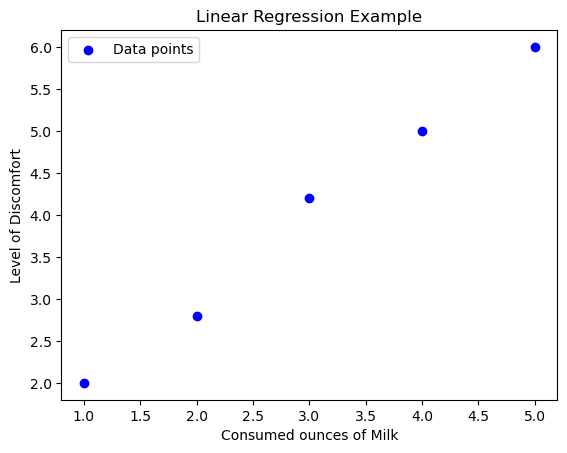

In [19]:

# Input feature (X) and target variable (y)
X = np.array([1, 2, 3, 4, 5])
y = np.array([2, 2.8, 4.2, 5, 6])

# Plot the data points and the regression line
plt.scatter(X, y, color='blue', label='Data points')

plt.xlabel('Consumed ounces of Milk')
plt.ylabel('Level of Discomfort')
plt.title('Linear Regression Example')
plt.legend()
plt.show()

In [9]:
# Compute the beta coefficients by hand
X_mean = np.mean(X)
y_mean = np.mean(y)

# Calculate the numerator and denominator for beta_1
numerator   = np.sum((X - X_mean) * (y - y_mean))
denominator = np.sum((X - X_mean) ** 2)

# Calculate beta_1 and beta_0
beta_1 = numerator / denominator
beta_0 = y_mean - beta_1 * X_mean

print(f"Computed by hand - beta_0 (intercept): {beta_0}, beta_1 (slope): {beta_1}")


Computed by hand - beta_0 (intercept): -0.8000000000000003, beta_1 (slope): 0.9


In [20]:
# Compute the beta coefficients using scikit-learn
from sklearn.linear_model import LinearRegression

# Reshape X to fit the model
X_reshaped = X.reshape(-1, 1)

# Create and fit the model
model = LinearRegression().fit(X_reshaped, y)

# Extract the coefficients
beta_0_sklearn = model.intercept_
beta_1_sklearn = model.coef_[0]

print(f"Computed using scikit-learn - beta_0 (intercept): {beta_0_sklearn}, beta_1 (slope): {beta_1_sklearn}")


Computed using scikit-learn - beta_0 (intercept): 0.9399999999999995, beta_1 (slope): 1.0200000000000002


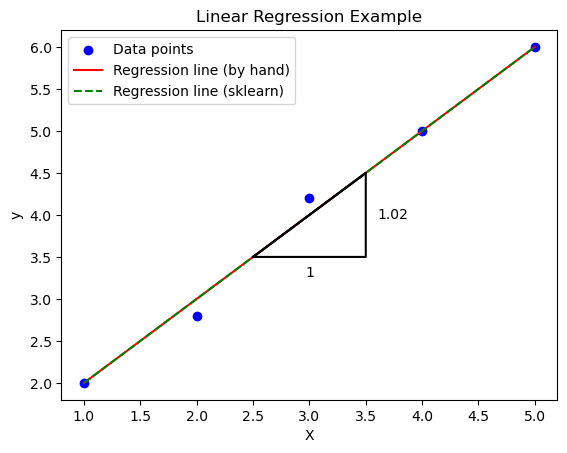

In [23]:

# Plot the data points and the regression lines
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, beta_0_sklearn + beta_1_sklearn * X, color='green', linestyle='dashed', label='Regression line (sklearn)')

# Define the midpoint
mid_x = (np.min(X) + np.max(X)) / 2
mid_y = (np.min(y) + np.max(y)) / 2

# Define the points of the triangle
triangle_x = [mid_x - 0.5, mid_x + 0.5, mid_x + 0.5, mid_x - 0.5]
triangle_y = [mid_y - 0.5, mid_y - 0.5, mid_y + 0.5, mid_y - 0.5]

# Plot the triangle
plt.plot(triangle_x, triangle_y, 'k-')
plt.plot([mid_x - 0.5, mid_x + 0.5], [mid_y - 0.5, mid_y + 0.5], 'k-')

# Annotations to indicate the slope
plt.text(mid_x, mid_y - 0.6, '1', ha='center', va='top')
plt.text(mid_x + 0.6, mid_y, '1.02', ha='left', va='center')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Example')
plt.legend()
plt.show()


### Creating our historical returns dataset

In [1]:
# Import yfinance library
import yfinance as yf
import pandas as pd
import numpy as np
import hvplot.pandas
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [2]:
# Define the list of tickers
sp500_tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]['Symbol'].tolist()
sp500_tickers[1:10]

['AOS', 'ABT', 'ABBV', 'ACN', 'ADBE', 'AMD', 'AES', 'AFL', 'A']

In [3]:
# Define the list of tickers
sp500_tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]['Symbol'].tolist()
sp500_tickers[1:10]

['AOS', 'ABT', 'ABBV', 'ACN', 'ADBE', 'AMD', 'AES', 'AFL', 'A']

In [4]:
# Filter out Class B shares that have a '.B' in the ticker name
sp500_tickers = [ticker for ticker in sp500_tickers if '.B' not in ticker]

In [5]:
# Define the start and end dates  
start_date = '2000-01-01'
end_date   = '2024-05-01'

# Define the list of tickers
sp500_tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]['Symbol'].tolist()

# Filter out Class B shares that have a '.B' in the ticker name
sp500_tickers = [ticker for ticker in sp500_tickers if '.B' not in ticker]

# Download historical prices for the list of tickers
historical_prices = yf.download(sp500_tickers, start=start_date, end=end_date)

historical_prices.head()

[*********************100%%**********************]  501 of 501 completed


Price      Adj Close                                                         \
Ticker             A AAL   AAPL ABBV ABNB    ABT   ACGL ACN    ADBE     ADI   
Date                                                                          
2000-01-03   43.6130 NaN 0.8450  NaN  NaN 8.9929 1.2778 NaN 16.2747 28.3256   
2000-01-04   40.2815 NaN 0.7737  NaN  NaN 8.7359 1.2708 NaN 14.9094 26.8927   
2000-01-05   37.7828 NaN 0.7851  NaN  NaN 8.7199 1.3889 NaN 15.2042 27.2853   
2000-01-06   36.3442 NaN 0.7171  NaN  NaN 9.0250 1.3750 NaN 15.3283 26.5393   
2000-01-07   39.3728 NaN 0.7511  NaN  NaN 9.1213 1.4514 NaN 16.0730 27.2853   

Price       ... Volume                                                    \
Ticker      ...    WTW       WY WYNN      XEL       XOM XYL      YUM ZBH   
Date        ...                                                            
2000-01-03  ...    NaN   973700  NaN  2738600  13458200 NaN  3033493 NaN   
2000-01-04  ...    NaN  1201700  NaN   425200  14510800 NaN  3315031 NaN   
2000-01-05  ...    NaN  1184600  NaN   500200  17485000 NaN  4642602 NaN   
2000-01-06  ...    NaN  1307700  NaN   344100  19461600 NaN  3947658 NaN   
2000-01-07  ...    NaN  1728000  NaN   469500  16603800 NaN  6063647 NaN   

Price                    
Ticker         ZBRA ZTS  
Date                     
2000-01-03  1055700 NaN  
2000-01-04   522450 NaN  
2000-01-05   612225 NaN  
2000-01-06   263925 NaN  
2000-01-07   333900 NaN  

[5 rows x 3006 columns]

In [6]:
# Filter and keep only columns where the first level of the MultiIndex is 'Adj Close'
historical_prices  = historical_prices.loc[:, historical_prices.columns.get_level_values(0) == 'Adj Close']
historical_prices.head()

Price      Adj Close                                                         \
Ticker             A AAL   AAPL ABBV ABNB    ABT   ACGL ACN    ADBE     ADI   
Date                                                                          
2000-01-03   43.6130 NaN 0.8450  NaN  NaN 8.9929 1.2778 NaN 16.2747 28.3256   
2000-01-04   40.2815 NaN 0.7737  NaN  NaN 8.7359 1.2708 NaN 14.9094 26.8927   
2000-01-05   37.7828 NaN 0.7851  NaN  NaN 8.7199 1.3889 NaN 15.2042 27.2853   
2000-01-06   36.3442 NaN 0.7171  NaN  NaN 9.0250 1.3750 NaN 15.3283 26.5393   
2000-01-07   39.3728 NaN 0.7511  NaN  NaN 9.1213 1.4514 NaN 16.0730 27.2853   

Price       ...                                                             
Ticker      ... WTW      WY WYNN    XEL     XOM XYL    YUM ZBH    ZBRA ZTS  
Date        ...                                                             
2000-01-03  ... NaN 11.4279  NaN 6.9780 18.1810 NaN 4.6574 NaN 25.0278 NaN  
2000-01-04  ... NaN 10.9986  NaN 7.1387 17.8328 NaN 4.5638 NaN 24.6667 NaN  
2000-01-05  ... NaN 11.5812  NaN 7.4141 18.8050 NaN 4.5872 NaN 25.1389 NaN  
2000-01-06  ... NaN 12.1230  NaN 7.3453 19.7771 NaN 4.5482 NaN 23.7778 NaN  
2000-01-07  ... NaN 11.7243  NaN 7.3453 19.7191 NaN 4.4468 NaN 23.5139 NaN  

[5 rows x 501 columns]

In [7]:
# Remove the MultiIndex and keep only the second level
historical_prices.columns = historical_prices.columns.droplevel(0)   
historical_prices.head()

Ticker,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,43.6130,NaN,0.8450,NaN,NaN,8.9929,1.2778,NaN,16.2747,28.3256,...,NaN,11.4279,NaN,6.9780,18.1810,NaN,4.6574,NaN,25.0278,NaN
2000-01-04,40.2815,NaN,0.7737,NaN,NaN,8.7359,1.2708,NaN,14.9094,26.8927,...,NaN,10.9986,NaN,7.1387,17.8328,NaN,4.5638,NaN,24.6667,NaN
2000-01-05,37.7828,NaN,0.7851,NaN,NaN,8.7199,1.3889,NaN,15.2042,27.2853,...,NaN,11.5812,NaN,7.4141,18.8050,NaN,4.5872,NaN,25.1389,NaN
2000-01-06,36.3442,NaN,0.7171,NaN,NaN,9.0250,1.3750,NaN,15.3283,26.5393,...,NaN,12.1230,NaN,7.3453,19.7771,NaN,4.5482,NaN,23.7778,NaN
2000-01-07,39.3728,NaN,0.7511,NaN,NaN,9.1213,1.4514,NaN,16.0730,27.2853,...,NaN,11.7243,NaN,7.3453,19.7191,NaN,4.4468,NaN,23.5139,NaN


In [8]:
MIN_REQUIRED_NUM_OBS_PER_TICKER = 100
# Count non-missing values for each ticker
ticker_counts = historical_prices.count()
ticker_counts

Ticker
A       6120
AAL     4679
AAPL    6120
ABBV    2851
ABNB     851
        ... 
XYL     3156
YUM     6120
ZBH     5727
ZBRA    6120
ZTS     2830
Length: 501, dtype: int64

In [9]:
# Filter out tickers with fewer than n=MIN_REQUIRED_NUM_OBS_PER_TICKER=100 non-missing values
valid_tickers_mask = ticker_counts[ticker_counts >= MIN_REQUIRED_NUM_OBS_PER_TICKER].index
valid_tickers_mask

Index(['A', 'AAL', 'AAPL', 'ABBV', 'ABNB', 'ABT', 'ACGL', 'ACN', 'ADBE', 'ADI',
       ...
       'WTW', 'WY', 'WYNN', 'XEL', 'XOM', 'XYL', 'YUM', 'ZBH', 'ZBRA', 'ZTS'],
      dtype='object', name='Ticker', length=499)

In [10]:
# Filter the DataFrame based on valid tickers
historical_prices = historical_prices[valid_tickers_mask]

In [11]:
# Create a function called 'computingReturns' that takes prices and a list of integers (momentums) as an inputs
def computingReturns(prices, list_of_momentums): 
    # Initialize the forecast horizon
    forecast_horizon = 1
    # Compute forward returns by taking percentage change of close prices
    # and shifting by the forecast horizon
    f_returns = prices.pct_change(forecast_horizon, fill_method=None)
    f_returns = f_returns.shift(-forecast_horizon)
    # Convert the result to a DataFrame
    f_returns = pd.DataFrame(f_returns.unstack())
    # Name the column based on the forecast horizon
    name = "F_" + str(forecast_horizon) + "_d_returns"
    f_returns.rename(columns={0: name}, inplace=True)
    # Initialize total_returns with forward returns
    total_returns = f_returns
    
    # Iterate over the list of momentum values
    for i in list_of_momentums:   
        # Compute returns for each momentum value
        feature = prices.pct_change(i, fill_method=None)
        feature = pd.DataFrame(feature.unstack())
        # Name the column based on the momentum value
        name = str(i) + "_d_returns"        
        feature.rename(columns={0: name}, inplace=True)
        # Rename columns and reset index
        feature.rename(columns={0: name, 'level_0': 'Ticker'}, inplace=True)
        # Merge computed feature returns with total_returns based on Ticker and Date
        total_returns = pd.merge(total_returns, feature, left_index=True, right_index=True,how='outer')
    
    # Drop rows with any NaN values
    total_returns.dropna(axis=0, how='any', inplace=True) 

    # Return the computed total returns DataFrame
    return total_returns

In [12]:
# Create a list of momentums for 1d and 2d returns
list_of_momentums = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 60]
# Run the function computingReturns and save the output as total_data
total_returns = computingReturns(historical_prices, list_of_momentums)
#Print the first 5 rows of total_data
total_returns.head()

F_1_d_returns  1_d_returns  2_d_returns  3_d_returns  \
Ticker Date                                                               
A      2000-03-29        -0.0625      -0.0598      -0.0197      -0.0667   
       2000-03-30        -0.0095      -0.0625      -0.1186      -0.0810   
       2000-03-31        -0.0577      -0.0095      -0.0714      -0.1270   
       2000-04-03        -0.0459      -0.0577      -0.0667      -0.1250   
       2000-04-04         0.0368      -0.0459      -0.1010      -0.1095   

                   4_d_returns  5_d_returns  6_d_returns  7_d_returns  \
Ticker Date                                                             
A      2000-03-29      -0.0642      -0.0623      -0.0261      -0.0154   
       2000-03-30      -0.1250      -0.1227      -0.1209      -0.0870   
       2000-03-31      -0.0897      -0.1333      -0.1311      -0.1293   
       2000-04-03      -0.1773      -0.1422      -0.1833      -0.1812   
       2000-04-04      -0.1652      -0.2151      -0.1816      -0.2208   

                   8_d_returns  9_d_returns  10_d_returns  15_d_returns  \
Ticker Date                                                               
A      2000-03-29      -0.0753      -0.0513       -0.0197       -0.2632   
       2000-03-30      -0.0769      -0.1331       -0.1106       -0.3137   
       2000-03-31      -0.0957      -0.0857       -0.1414       -0.2676   
       2000-04-03      -0.1795      -0.1478       -0.1385       -0.2533   
       2000-04-04      -0.2188      -0.2172       -0.1870       -0.2297   

                   20_d_returns  25_d_returns  30_d_returns  60_d_returns  
Ticker Date                                                                
A      2000-03-29        0.0263        0.1313        0.3679        0.5556  
       2000-03-30       -0.0028       -0.0164        0.2963        0.5789  
       2000-03-31       -0.0370       -0.0382        0.0722        0.6673  
       2000-04-03       -0.3836       -0.0297        0.0453        0.6333  
       2000-04-04       -0.3415       -0.0999        0.0219        0.4385

In [ ]:
#total_returns = total_returns.filter(items=['F_1_d_returns', '1_d_returns'])
#total_returns.head()

In [22]:
total_returns.index.get_level_values('Ticker').nunique()

499

In [23]:
total_returns.index.get_level_values('Date').value_counts().describe()

count   6059.0000
mean     443.4205
std       44.0222
min      355.0000
25%      408.0000
50%      448.0000
75%      485.0000
max      499.0000
Name: count, dtype: float64

In [24]:
# How many tickers do we have at each date?
tickers_per_date = total_returns.index.get_level_values('Date').value_counts()
tickers_per_date

Date
2024-04-29    499
2024-02-13    499
2024-02-01    499
2024-02-02    499
2024-02-05    499
             ... 
2000-04-18    355
2000-04-19    355
2000-04-20    355
2000-04-24    355
2000-03-29    355
Name: count, Length: 6059, dtype: int64

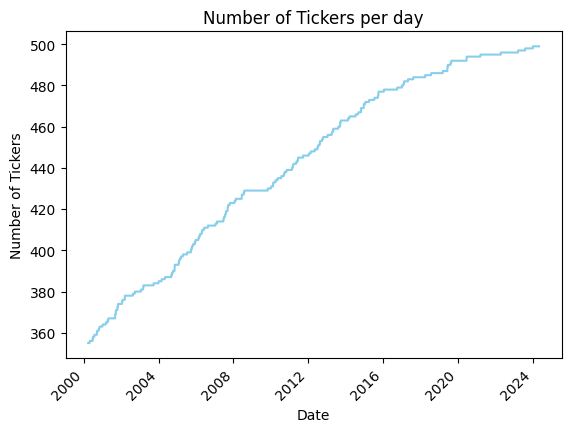

In [25]:
import matplotlib.pyplot as plt
tickers_per_date.plot(kind='line', color='skyblue')
plt.title('Number of Tickers per day')
plt.xlabel('Date')
plt.ylabel('Number of Tickers')
plt.xticks(rotation=45)
plt.show()

In [26]:
total_returns.describe()

,F_1_d_returns,1_d_returns
count,2686685.0000,2686685.0000
mean,0.0007,0.0007
std,0.0233,0.0233
min,-0.6805,-0.6805
25%,-0.0090,-0.0090
50%,0.0006,0.0006
75%,0.0102,0.0102
max,1.0236,1.0236


In [7]:
# Compute the daily mean of all stocks. This will be our equal weighted benchmark
daily_mean_bm  = pd.DataFrame(total_returns.loc[:,'F_1_d_returns'].groupby(level='Date').mean())
daily_mean_bm.rename(columns={'F_1_d_returns':'SP&500'}, inplace=True)

# Convert daily returns to cumulative returns
cum_returns_bm = pd.DataFrame((daily_mean_bm[['SP&500']]+1).cumprod())
#cum_returns_bm.rename(columns={'F_1_d_returns':'SP&500'}, inplace=True)

NameError: name 'pd' is not defined

In [9]:
# Plotting the cumulative returns
cum_returns_bm.plot()

# Customizing the plot
plt.title('Cumulative Returns Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative Return', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title_fontsize='13', fontsize='11')

# Display the plot
plt.show()

NameError: name 'cum_returns_bm' is not defined

In [29]:
# Calculate the number of years in the dataset
number_of_years = len(daily_mean_bm) / 252  # Assuming 252 trading days in a year

In [30]:
ending_value    = cum_returns_bm['SP&500'].iloc[-1]
beginning_value = cum_returns_bm['SP&500'].iloc[1]

In [31]:
# Compute the Compound Annual Growth Rate (CAGR)
ratio = ending_value/beginning_value
cagr = round((ratio**(1/number_of_years)-1)*100,2)
print(f'The CAGR is: {cagr}%')

The CAGR is: 16.8%


In [32]:
daily_mean_bm[['SP&500']].describe()

,SP&500
count,6059.0000
mean,0.0007
std,0.0129
min,-0.1272
25%,-0.0048
50%,0.0011
75%,0.0066
max,0.1152


In [44]:
# Compute the Sharpe Ratio by annualizing the daily mean and the daily std
average_daily_return    = daily_mean_bm[['SP&500']].describe().iloc[1,:] * 252
stand_dev_dail_return   = daily_mean_bm[['SP&500']].describe().iloc[2,:] * pow(252,1/2)

In [45]:
# Compute the Sharpe Ratio by annualizing the daily mean and the daily std
average_daily_return    = daily_mean_bm[['SP&500']].describe().iloc[1,:] * 252
stand_dev_dail_return   = daily_mean_bm[['SP&500']].describe().iloc[2,:] * pow(252,1/2)

sharpe  = average_daily_return/stand_dev_dail_return

print(f'Sharpe Ratio of Strategy: {round(sharpe.iloc[0],2)}')

Sharpe Ratio of Strategy: 0.87


In [493]:
#df_daily_mean.rename(columns={target:'Strategy'},inplace=True)
ann_returns = (pd.DataFrame((daily_mean_bm[['SP&500']]+1).groupby(daily_mean_bm.index.get_level_values(0).year).cumprod())-1)*100
calendar_returns  = pd.DataFrame(ann_returns['SP&500'].groupby(daily_mean_bm.index.get_level_values(0).year).last())

In [494]:
calendar_returns.hvplot.bar(rot=30,  legend='top_left').opts(multi_level=False) 

:Bars   [Date]   (SP&500)

In [48]:
# Create a function to calculate RSI using returns
def calculate_rsi(returns, window=14):    
    gain = returns[returns>0].dropna().rolling(window=window).mean()    
    gain.name = 'gain'
    loss = returns[returns<0].dropna().rolling(window=window).mean()    
    loss.name = 'loss'
    returns = pd.merge(returns, gain, left_index=True, right_index=True, how='left')    
    returns = pd.merge(returns, loss, left_index=True, right_index=True, how='left')
    returns = returns.ffill()
    returns.dropna(inplace=True)
    ratio = returns['gain']/abs(returns['loss'])
    rsi = 100 - (100 / (1 + ratio))
    return rsi

In [49]:
# Calculate RSI for each ticker separately and add to the DataFrame
total_returns['RSI'] = total_returns.groupby('Ticker')[['1_d_returns']].transform(calculate_rsi)

In [50]:
total_returns[['RSI']].describe()

,RSI
count,2670397.0000
mean,50.9432
std,8.4128
min,8.0071
25%,45.2198
50%,50.9167
75%,56.6260
max,89.2621


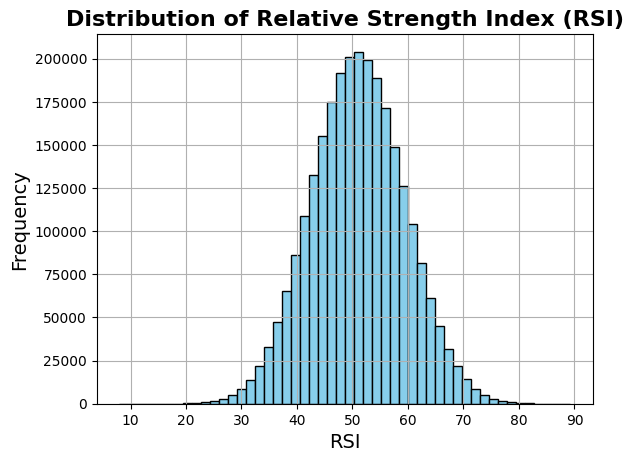

In [51]:
# Customizing the histogram
histogram_plot = total_returns[['RSI']].hist(bins=50, ax=plt.gca(), color='skyblue', edgecolor='black')

# Adding titles and labels
plt.title('Distribution of Relative Strength Index (RSI)', fontsize=16, fontweight='bold')
plt.xlabel('RSI', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)  # Turn off gridlines for histograms

# Displaying the plot
plt.show()

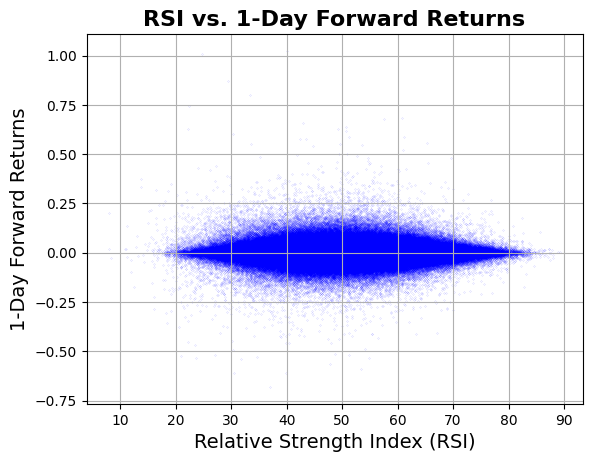

In [52]:
scatter_plot = total_returns.plot.scatter(x='RSI', y='F_1_d_returns', ax=plt.gca(), color='blue', alpha=0.6,s=0.01)

# Adding titles and labels
plt.title('RSI vs. 1-Day Forward Returns', fontsize=16, fontweight='bold')
plt.xlabel('Relative Strength Index (RSI)', fontsize=14)
plt.ylabel('1-Day Forward Returns', fontsize=14)
plt.grid(True)

# Displaying the plot
#plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()

In [53]:
total_returns[['F_1_d_returns', 'RSI']].corr().style.background_gradient()

,F_1_d_returns,RSI
F_1_d_returns,1.000000,-0.004334
RSI,-0.004334,1.000000


<Axes: xlabel='Quantiles'>

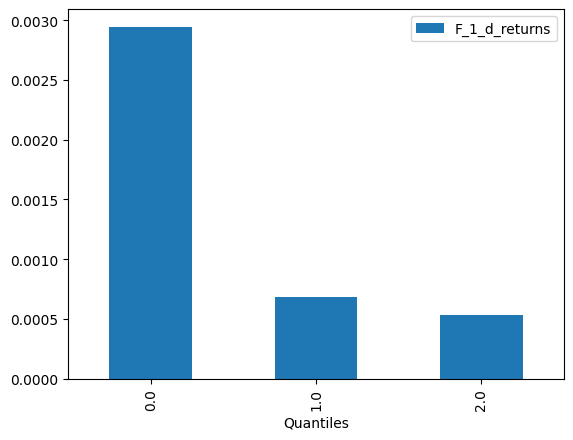

In [54]:
feature = 'RSI'
target = 'F_1_d_returns'

# Specify custom bin boundaries
bin_boundaries = [0, 30, 70, 100]

total_returns['Quantiles'] = total_returns.groupby(level='Date')[feature].transform(lambda x: pd.cut(x, bins=bin_boundaries, labels=False, precision=0, duplicates='drop'))

total_returns.groupby('Quantiles')[[target]].mean().plot(kind='bar', legend=True)

In [13]:
total_returns.head()

F_1_d_returns  1_d_returns  2_d_returns  3_d_returns  \
Ticker Date                                                               
A      2000-03-29        -0.0625      -0.0598      -0.0197      -0.0667   
       2000-03-30        -0.0095      -0.0625      -0.1186      -0.0810   
       2000-03-31        -0.0577      -0.0095      -0.0714      -0.1270   
       2000-04-03        -0.0459      -0.0577      -0.0667      -0.1250   
       2000-04-04         0.0368      -0.0459      -0.1010      -0.1095   

                   4_d_returns  5_d_returns  6_d_returns  7_d_returns  \
Ticker Date                                                             
A      2000-03-29      -0.0642      -0.0623      -0.0261      -0.0154   
       2000-03-30      -0.1250      -0.1227      -0.1209      -0.0870   
       2000-03-31      -0.0897      -0.1333      -0.1311      -0.1293   
       2000-04-03      -0.1773      -0.1422      -0.1833      -0.1812   
       2000-04-04      -0.1652      -0.2151      -0.1816      -0.2208   

                   8_d_returns  9_d_returns  10_d_returns  15_d_returns  \
Ticker Date                                                               
A      2000-03-29      -0.0753      -0.0513       -0.0197       -0.2632   
       2000-03-30      -0.0769      -0.1331       -0.1106       -0.3137   
       2000-03-31      -0.0957      -0.0857       -0.1414       -0.2676   
       2000-04-03      -0.1795      -0.1478       -0.1385       -0.2533   
       2000-04-04      -0.2188      -0.2172       -0.1870       -0.2297   

                   20_d_returns  25_d_returns  30_d_returns  60_d_returns  
Ticker Date                                                                
A      2000-03-29        0.0263        0.1313        0.3679        0.5556  
       2000-03-30       -0.0028       -0.0164        0.2963        0.5789  
       2000-03-31       -0.0370       -0.0382        0.0722        0.6673  
       2000-04-03       -0.3836       -0.0297        0.0453        0.6333  
       2000-04-04       -0.3415       -0.0999        0.0219        0.4385

## Beginning Lesson 3

### Data Preparation

In [3]:
import sys
import os
# Manually set the path relative to the py file's location that you want to import
func_lib_path = os.path.abspath(os.path.join(os.getcwd(), '../'))

# Add the path to sys.path
sys.path.append(func_lib_path)

# Now you can import func_lib
import func_lib

In [4]:
import pandas as pd

In [7]:
# Set display options to round to 2 decimal places
pd.options.display.float_format = "{:.2f}".format

In [9]:
historical_prices = func_lib.createHistPrices()
# Create a list of momentums for 1d and 2d returns
list_of_momentums = [1, 5, 15, 20]
# Run the function computingReturns and save the output as total_data
total_returns = func_lib.computingReturns(historical_prices, list_of_momentums)
#Print the first 5 rows of total_data

[**********************61%%***                   ]  307 of 501 completed

$ADBE: possibly delisted; No price data found  (1d 2000-01-01 -> 2024-05-01)


[*********************100%%**********************]  501 of 501 completed

2 Failed downloads:
['SW']: YFChartError("%ticker%: Data doesn't exist for startDate = 946702800, endDate = 1714536000")
['ADBE']: YFPricesMissingError('$%ticker%: possibly delisted; No price data found  (1d 2000-01-01 -> 2024-05-01)')


In [10]:

import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

## Definining Train Test Data

In [39]:
# Determine the split index for 70% of the dates
unique_dates = total_returns.index.get_level_values('Date').unique()
split_date = unique_dates[int(0.7 * len(unique_dates))]
split_date

Timestamp('2017-01-20 00:00:00')

In [13]:
# Create the training set: all data before the split date
train_data = total_returns.loc[total_returns.index.get_level_values('Date') < split_date]

# Create the testing set: all data from the split date onwards
test_data = total_returns.loc[total_returns.index.get_level_values('Date') >= split_date]

In [14]:
features = ['1_d_returns', '5_d_returns', '15_d_returns', '20_d_returns']
target   = ['F_1_d_returns']

# Split the data into training and testing sets
X_train = train_data[features]
X_test  = test_data[features]
y_train = train_data[target]
y_test  = test_data[target]

In [15]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, index=X_train.index, columns=X_train.columns)
X_test_scaled  = pd.DataFrame(X_test_scaled, index=X_test.index, columns=X_test.columns)

##  Benchmark

## Regression 

In [19]:
# Add a constant to the model (intercept)
X_train_scaled_const_add = sm.add_constant(X_train_scaled)
X_test_scaled_const_add  = sm.add_constant(X_test_scaled)

# Fit the model
model = sm.OLS(y_train, X_train_scaled_const_add).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          F_1_d_returns   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     674.0
Date:                Thu, 22 Aug 2024   Prob (F-statistic):               0.00
Time:                        16:09:27   Log-Likelihood:             4.1177e+06
No. Observations:             1791050   AIC:                        -8.235e+06
Df Residuals:                 1791045   BIC:                        -8.235e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0007   1.81e-05     40.082   

In [20]:
model_name = 'Reg'

In [44]:
y_test_df.head()

F_1_d_returns
Ticker Date                     
A      2017-01-20          -0.00
       2017-01-23          -0.00
       2017-01-24           0.02
       2017-01-25          -0.00
       2017-01-26           0.01

In [21]:
# Make predictions
y_pred = model.predict(X_test_scaled_const_add)

y_test_df = pd.DataFrame(y_test)
y_pred_df = pd.DataFrame(y_pred)
y_pred_df.rename(columns={0:model_name}, inplace=True)

y_test_and_pred = pd.merge(y_test_df, y_pred_df, left_index=True, right_index=True)


## Evaluation

In [23]:
# Define trading strategy based on RSI
def trading_strategy(y_pred):
    if y_pred >0:
        return  1 # Go long
    else:
        return  0  

In [42]:
y_test_and_pred.head()

F_1_d_returns  Reg  Position  Reg_Return
Ticker Date                                                
A      2017-01-20          -0.00 0.00         1       -0.00
       2017-01-23          -0.00 0.00         1       -0.00
       2017-01-24           0.02 0.00         1        0.02
       2017-01-25          -0.00 0.00         1       -0.00
       2017-01-26           0.01 0.00         1        0.01

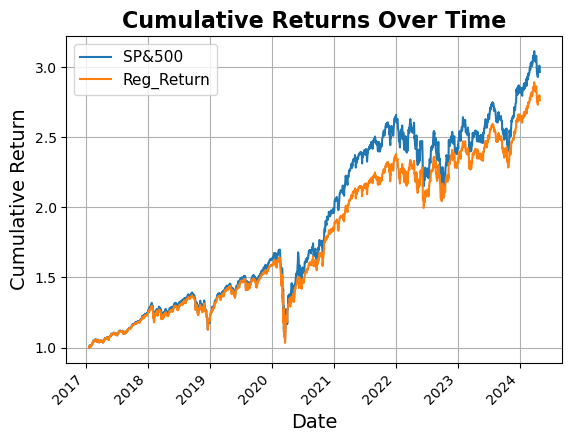

The CAGR is: 14.92%
Sharpe Ratio of Strategy: 0.88


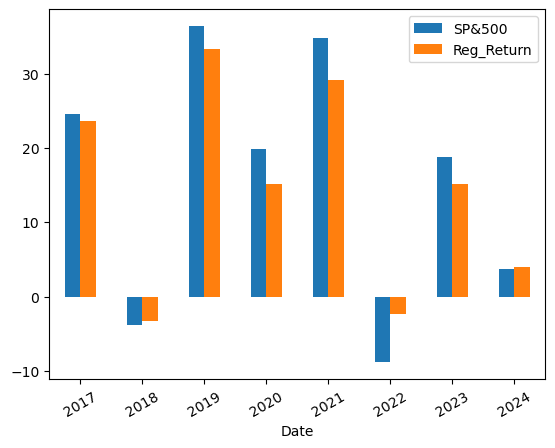

In [25]:

cum_returns, calendar_returns = func_lib.compute_BM_Perf(test_data)
cum_returns, calendar_returns = func_lib.compute_strat_perf(y_test_and_pred, cum_returns, calendar_returns, trading_strategy, model_name)

In [ ]:
# Add a constant to the model (intercept)
import statsmodels.api as sm
X_train_scaled_const_add = sm.add_constant(X_train_scaled)
X_test_scaled_const_add  = sm.add_constant(X_test_scaled)

# Fit the model
model = sm.OLS(y_train, X_train_scaled_const_add).fit()

# Print the model summary
print(model.summary())


model_name = 'Reg'

# Make predictions
y_pred = model.predict(X_test_scaled_const_add)

y_test_df = pd.DataFrame(y_test)
y_pred_df = pd.DataFrame(y_pred)
y_pred_df.rename(columns={0:model_name}, inplace=True)

y_test_and_pred = pd.merge(y_test_df, y_pred_df, left_index=True, right_index=True)


# Define trading strategy based on RSI
def trading_strategy(y_pred):
    if y_pred >0:
        return  1 # Go long
    else:
        return  0  


cum_returns, calendar_returns = func_lib.compute_BM_Perf(test_data)
cum_returns, calendar_returns = func_lib.compute_strat_perf(y_test_and_pred, cum_returns, calendar_returns, trading_strategy, model_name)

### Lasso

In [ ]:
# Determine the split index for 70% of the dates
unique_dates = total_returns.index.get_level_values('Date').unique()
split_date = unique_dates[int(0.7 * len(unique_dates))]
# Create the training set: all data before the split date
train_data = total_returns.loc[total_returns.index.get_level_values('Date') < split_date]

# Create the testing set: all data from the split date onwards
test_data = total_returns.loc[total_returns.index.get_level_values('Date') >= split_date]

features = ['1_d_returns', '5_d_returns', '15_d_returns', '20_d_returns']
target   = ['F_1_d_returns']

# Split the data into training and testing sets
X_train = train_data[features]
X_test  = test_data[features]
y_train = train_data[target]
y_test  = test_data[target]


# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, index=X_train.index, columns=X_train.columns)
X_test_scaled  = pd.DataFrame(X_test_scaled, index=X_test.index, columns=X_test.columns)

In [820]:
from sklearn.linear_model import Lasso
# Initialize and train Lasso regression model with grid search for alpha
model = Lasso(alpha=0.00001)
model.fit(X_train_scaled, y_train)

Lasso(alpha=1e-05)

In [821]:
model_name = 'Lasso'
# Make predictions
y_pred = model.predict(X_test_scaled)
y_pred_df = pd.DataFrame(y_pred, index= X_test_scaled.index)
y_pred_df.rename(columns={0:model_name}, inplace=True)
y_test_df = pd.DataFrame(y_test)

y_test_and_pred = pd.merge(y_test_df, y_pred_df, left_index=True, right_index=True)

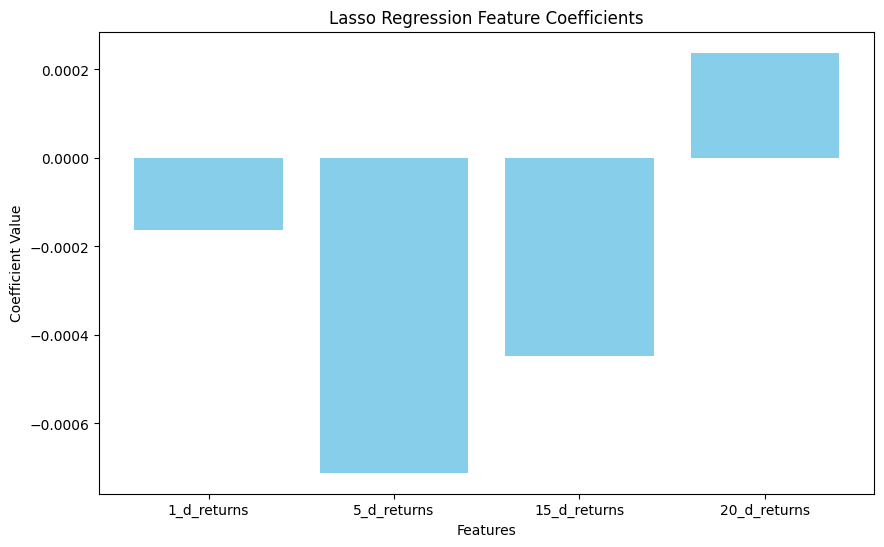

In [822]:
# Feature selection: extract coefficients
coefficients = model.coef_
intercept = model.intercept_
# Display the coefficients
feature_names = X_test.columns
# Plotting the coefficients
plt.figure(figsize=(10, 6))
plt.bar(feature_names, coefficients, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Lasso Regression Feature Coefficients')
plt.show()

In [824]:
model_name = 'Lasso'
# Define trading strategy based on RSI
def trading_strategy(y_pred):
    if y_pred >0:
        return  1 # Go long
    else:
        return 0
        


In [ ]:

cum_returns, calendar_returns = func_lib.compute_BM_Perf(test_data)
cum_returns, calendar_returns = func_lib.compute_strat_perf(y_test_and_pred, cum_returns, calendar_returns, trading_strategy, model_name)

### Ridge

In [828]:
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(X_train_scaled, y_train)

Ridge()

In [829]:
# Make predictions
y_pred = model.predict(X_test_scaled)
y_pred_df = pd.DataFrame(y_pred, index= X_test_scaled.index)
y_pred_df.rename(columns={0:"y_pred"}, inplace=True)
y_test_and_pred = pd.merge(y_test_df, y_pred_df, left_index=True, right_index=True)

In [830]:
model_name = 'Ridge'
# Define trading strategy based on RSI
def trading_strategy(y_pred):
    if y_pred >0:
        return  1 # Go long
    else:
        return 0
        
# Apply trading strategy to each RSI value
y_test_and_pred['Position'] = y_test_and_pred['y_pred'].transform(trading_strategy)
# Create Returns for each Trade
y_test_and_pred[f'{model_name}_Return'] = y_test_and_pred['F_1_d_returns'] *  y_test_and_pred['Position'] 


In [831]:
# Compute the daily mean of all stocks. This will be our equal weighted benchmark
daily_mean  = pd.DataFrame(y_test_and_pred.loc[:,f'{model_name}_Return'].groupby(level='Date').mean())

# Convert daily returns to cumulative returns
cum_returns.loc[:,f'{model_name}_Return'] = pd.DataFrame((daily_mean[[f'{model_name}_Return']]+1).cumprod())
# Calculate the number of years in the dataset
number_of_years = len(daily_mean) / 252  # Assuming 252 trading days in a year

ending_value    = cum_returns[f'{model_name}_Return'].iloc[-1]
beginning_value = cum_returns[f'{model_name}_Return'].iloc[1]

ratio = ending_value/beginning_value
# Compute the Compound Annual Growth Rate (CAGR)
cagr = round((ratio**(1/number_of_years)-1)*100,2)

print(f'The CAGR is: {cagr}%')
# Compute the Sharpe Ratio by annualizing the daily mean and the daily std
mean  = daily_mean[[f'{model_name}_Return']].describe().iloc[1,:] * 252
std   = daily_mean[[f'{model_name}_Return']].describe().iloc[2,:] * pow(252,1/2)

# Compute the Sharpe Ratio and print it out
sharpe  = mean/std

print(f'Sharpe Ratio of Strategy: {round(sharpe.iloc[0],2)}')

The CAGR is: 14.51%
Sharpe Ratio of Strategy: 0.86


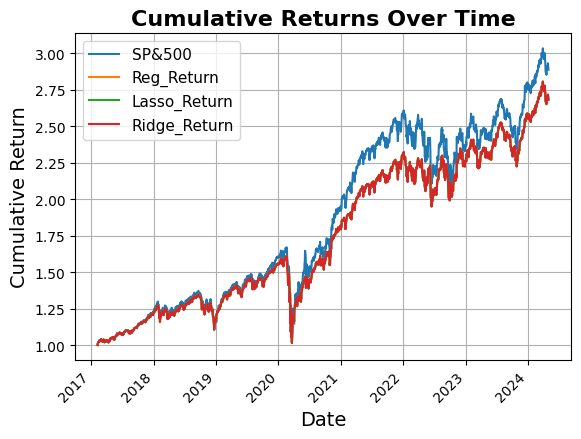

In [832]:
cum_returns.plot()
# Customizing the plot
plt.title('Cumulative Returns Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative Return', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title_fontsize='13', fontsize='11')
# Display the plot
plt.show()

In [834]:
ann_returns = (pd.DataFrame((daily_mean[[f'{model_name}_Return']]+1).groupby(daily_mean.index.get_level_values(0).year).cumprod())-1)*100
calendar_returns.loc[:,[f'{model_name}_Return']]  = pd.DataFrame(ann_returns[f'{model_name}_Return'].groupby(daily_mean.index.get_level_values(0).year).last())
calendar_returns.hvplot.bar(rot=30,  legend='top_left').opts(multi_level=False) 

:Bars   [Date,Variable]   (value)

### Elastic Net

In [835]:
from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha=0.001, l1_ratio=0.5) 
model.fit(X_train_scaled, y_train)

ElasticNet(alpha=0.001)

In [836]:
# Make predictions
y_pred = model.predict(X_test_scaled)
y_pred_df = pd.DataFrame(y_pred, index= X_test_scaled.index)
y_pred_df.rename(columns={0:"y_pred"}, inplace=True)
y_test_and_pred = pd.merge(y_test_df, y_pred_df, left_index=True, right_index=True)

In [837]:
model_name = 'ElasticNet'
# Define trading strategy based on RSI
def trading_strategy(y_pred):
    if y_pred >0:
        return  1 # Go long
    else:
        return 0
        
# Apply trading strategy to each RSI value
y_test_and_pred['Position'] = y_test_and_pred['y_pred'].transform(trading_strategy)
# Create Returns for each Trade
y_test_and_pred[f'{model_name}_Return'] = y_test_and_pred['F_1_d_returns'] *  y_test_and_pred['Position'] 

In [838]:
# Compute the daily mean of all stocks. This will be our equal weighted benchmark
daily_mean  = pd.DataFrame(y_test_and_pred.loc[:,f'{model_name}_Return'].groupby(level='Date').mean())

# Convert daily returns to cumulative returns
cum_returns.loc[:,f'{model_name}_Return'] = pd.DataFrame((daily_mean[[f'{model_name}_Return']]+1).cumprod())

In [839]:
# Calculate the number of years in the dataset
number_of_years = len(daily_mean) / 252  # Assuming 252 trading days in a year

ending_value    = cum_returns[f'{model_name}_Return'].iloc[-1]
beginning_value = cum_returns[f'{model_name}_Return'].iloc[1]

ratio = ending_value/beginning_value
# Compute the Compound Annual Growth Rate (CAGR)
cagr = round((ratio**(1/number_of_years)-1)*100,2)

print(f'The CAGR is: {cagr}%')
# Compute the Sharpe Ratio by annualizing the daily mean and the daily std
mean  = daily_mean[[f'{model_name}_Return']].describe().iloc[1,:] * 252
std   = daily_mean[[f'{model_name}_Return']].describe().iloc[2,:] * pow(252,1/2)

# Compute the Sharpe Ratio and print it out
sharpe  = mean/std

print(f'Sharpe Ratio of Strategy: {round(sharpe.iloc[0],2)}')

The CAGR is: 15.99%
Sharpe Ratio of Strategy: 0.88


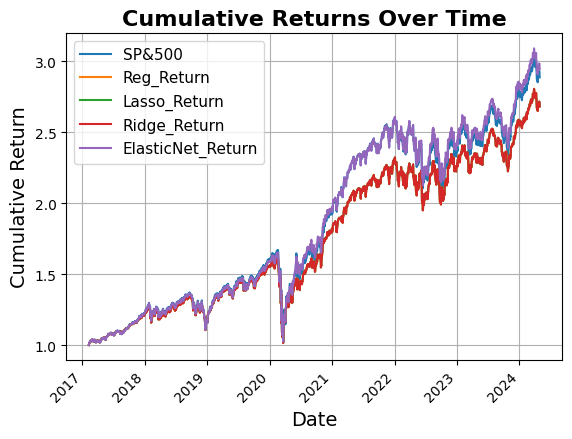

In [840]:
cum_returns.plot()

# Customizing the plot
plt.title('Cumulative Returns Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative Return', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title_fontsize='13', fontsize='11')

# Display the plot
plt.show()

In [841]:
ann_returns = (pd.DataFrame((daily_mean[[f'{model_name}_Return']]+1).groupby(daily_mean.index.get_level_values(0).year).cumprod())-1)*100
calendar_returns.loc[:,[f'{model_name}_Return']]  = pd.DataFrame(ann_returns[f'{model_name}_Return'].groupby(daily_mean.index.get_level_values(0).year).last())
calendar_returns.hvplot.bar(rot=30,  legend='top_left').opts(multi_level=False) 

:Bars   [Date,Variable]   (value)